## House Price Prediction Using Kaggle Data Set - KPMG Case Study

**Package Import**

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

**Data Import**

In [2]:
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')

In [3]:
traindf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
testdf.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


**EDA**

In [5]:
# Get number of null values in the varibles and its type
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
testdf.info() #test data frame null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

In [7]:
#getting number of varibales 
print(traindf.shape)
print(testdf.shape)

(1460, 81)
(1459, 80)


*As we don't have to bother about the null values in the test data now, we can explore testdf only in the coming data processing*

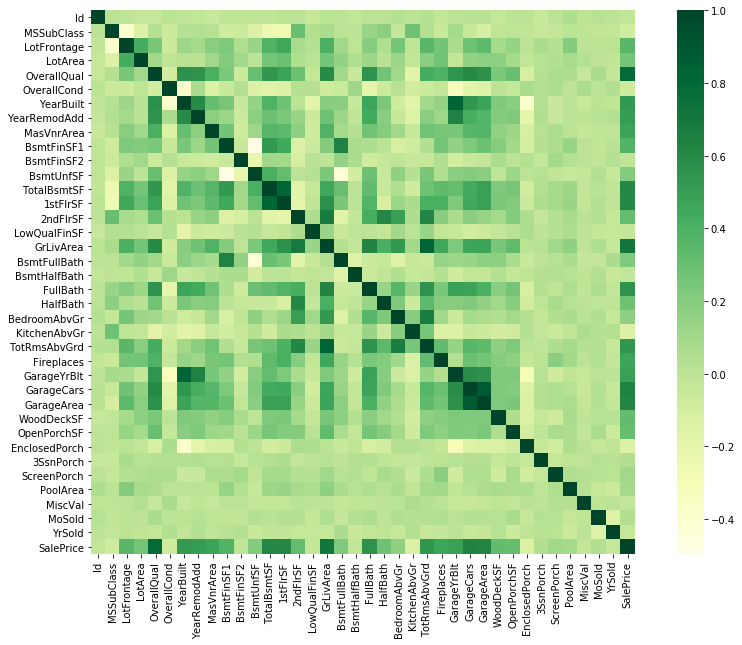

In [8]:
# Correlation between the variables:
corr = traindf.corr()
f,_ = plt.subplots(figsize=(15, 10))
sns.heatmap(corr,cmap='YlGn',vmax=1, square=True)

Text(0.5, 1.0, 'Number of NaN Values')

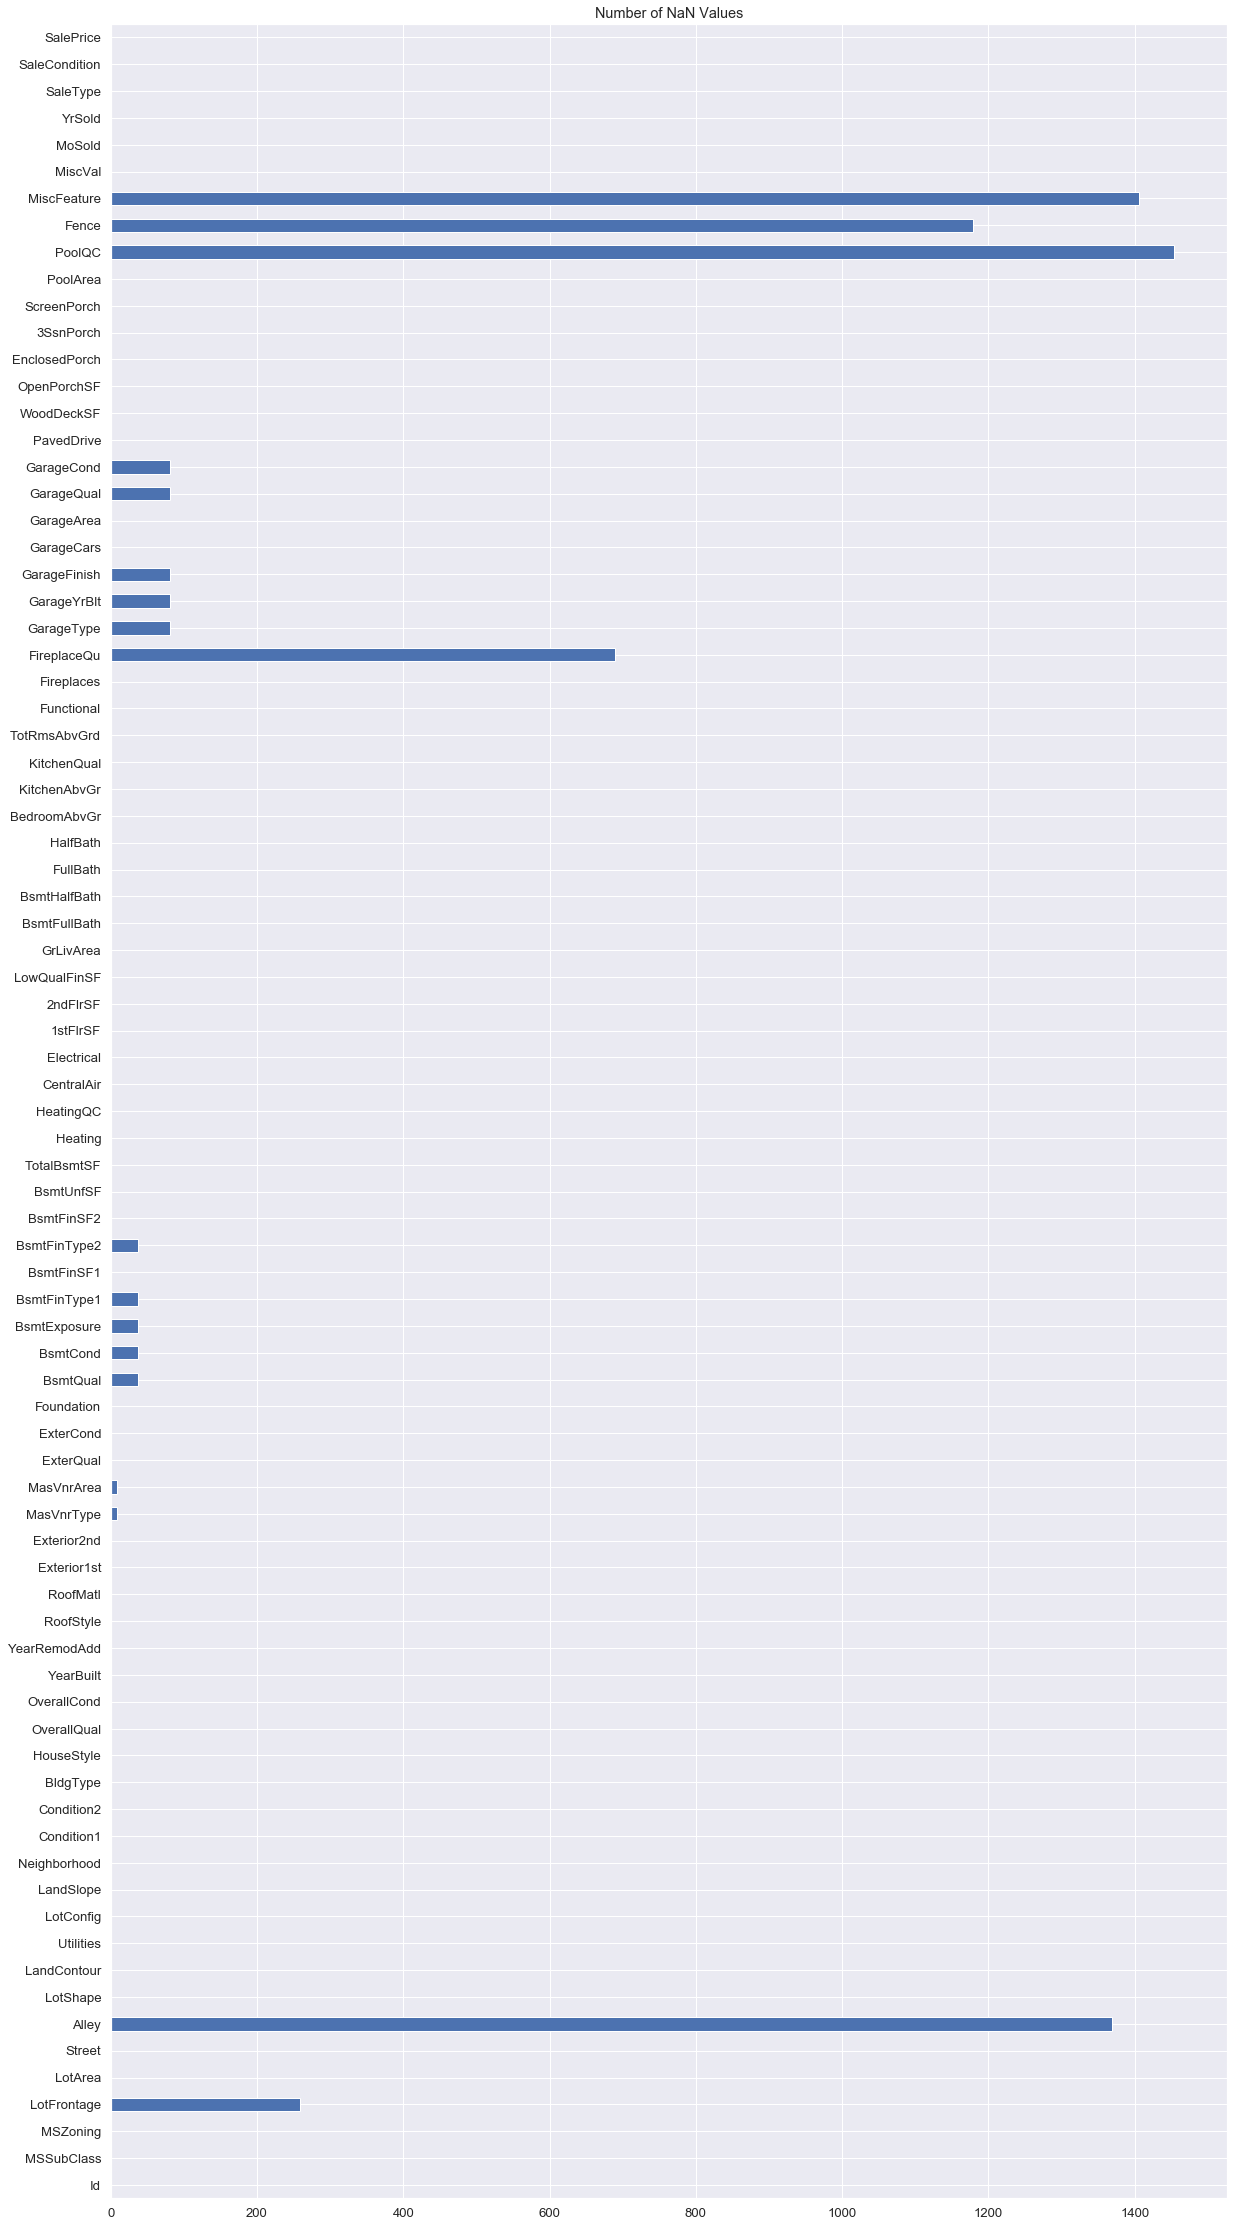

In [9]:
nanval = traindf.isna().sum()
plt.figure(figsize=(20, 40))
sns.set(font_scale=1.2)
nanval.plot(kind = "barh")
plt.title("Number of NaN Values")

In [10]:
traindf.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

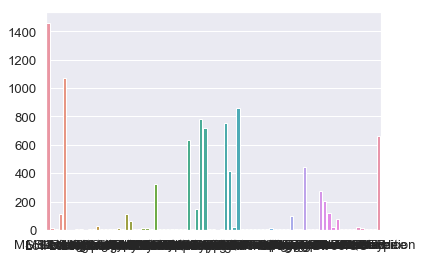

In [11]:

#visualize number of unique values
# Creating histogram
#groupedvalues=df.groupby('day').sum().reset_index()
g=sns.barplot(x=list(traindf.nunique().keys()),y=list(traindf.nunique()))

In [12]:
#checking any coloummn with only one variable
list(traindf.nunique())

[1460,
 15,
 5,
 110,
 1073,
 2,
 2,
 4,
 4,
 2,
 5,
 3,
 25,
 9,
 8,
 5,
 8,
 10,
 9,
 112,
 61,
 6,
 8,
 15,
 16,
 4,
 327,
 4,
 5,
 6,
 4,
 4,
 4,
 6,
 637,
 6,
 144,
 780,
 721,
 6,
 5,
 2,
 5,
 753,
 417,
 24,
 861,
 4,
 3,
 4,
 3,
 8,
 4,
 4,
 12,
 7,
 4,
 5,
 6,
 97,
 3,
 5,
 441,
 5,
 5,
 3,
 274,
 202,
 120,
 20,
 76,
 8,
 3,
 4,
 4,
 21,
 12,
 5,
 9,
 6,
 663]

In [13]:
#get pair wise correlation
#g.map(sns.scatterplot)
# too much in size

**Data Cleaning**

In [14]:
# remove id 
traindf.drop(['Id'],axis=1,inplace=True)
testdf.drop(['Id'],axis=1,inplace=True)

In [15]:
#Remove na values which are above 50%
#get all the na values
sampletotal = traindf.shape[0]/2
droplist = traindf.isnull().sum().keys()[traindf.isnull().sum()>sampletotal]

In [16]:
#droping each of the coloumn with more than 50% null values
for i in droplist:
    traindf.drop([i],axis=1,inplace=True)
    testdf.drop([i],axis=1,inplace=True)

Text(0.5, 1.0, 'Number of NaN Values')

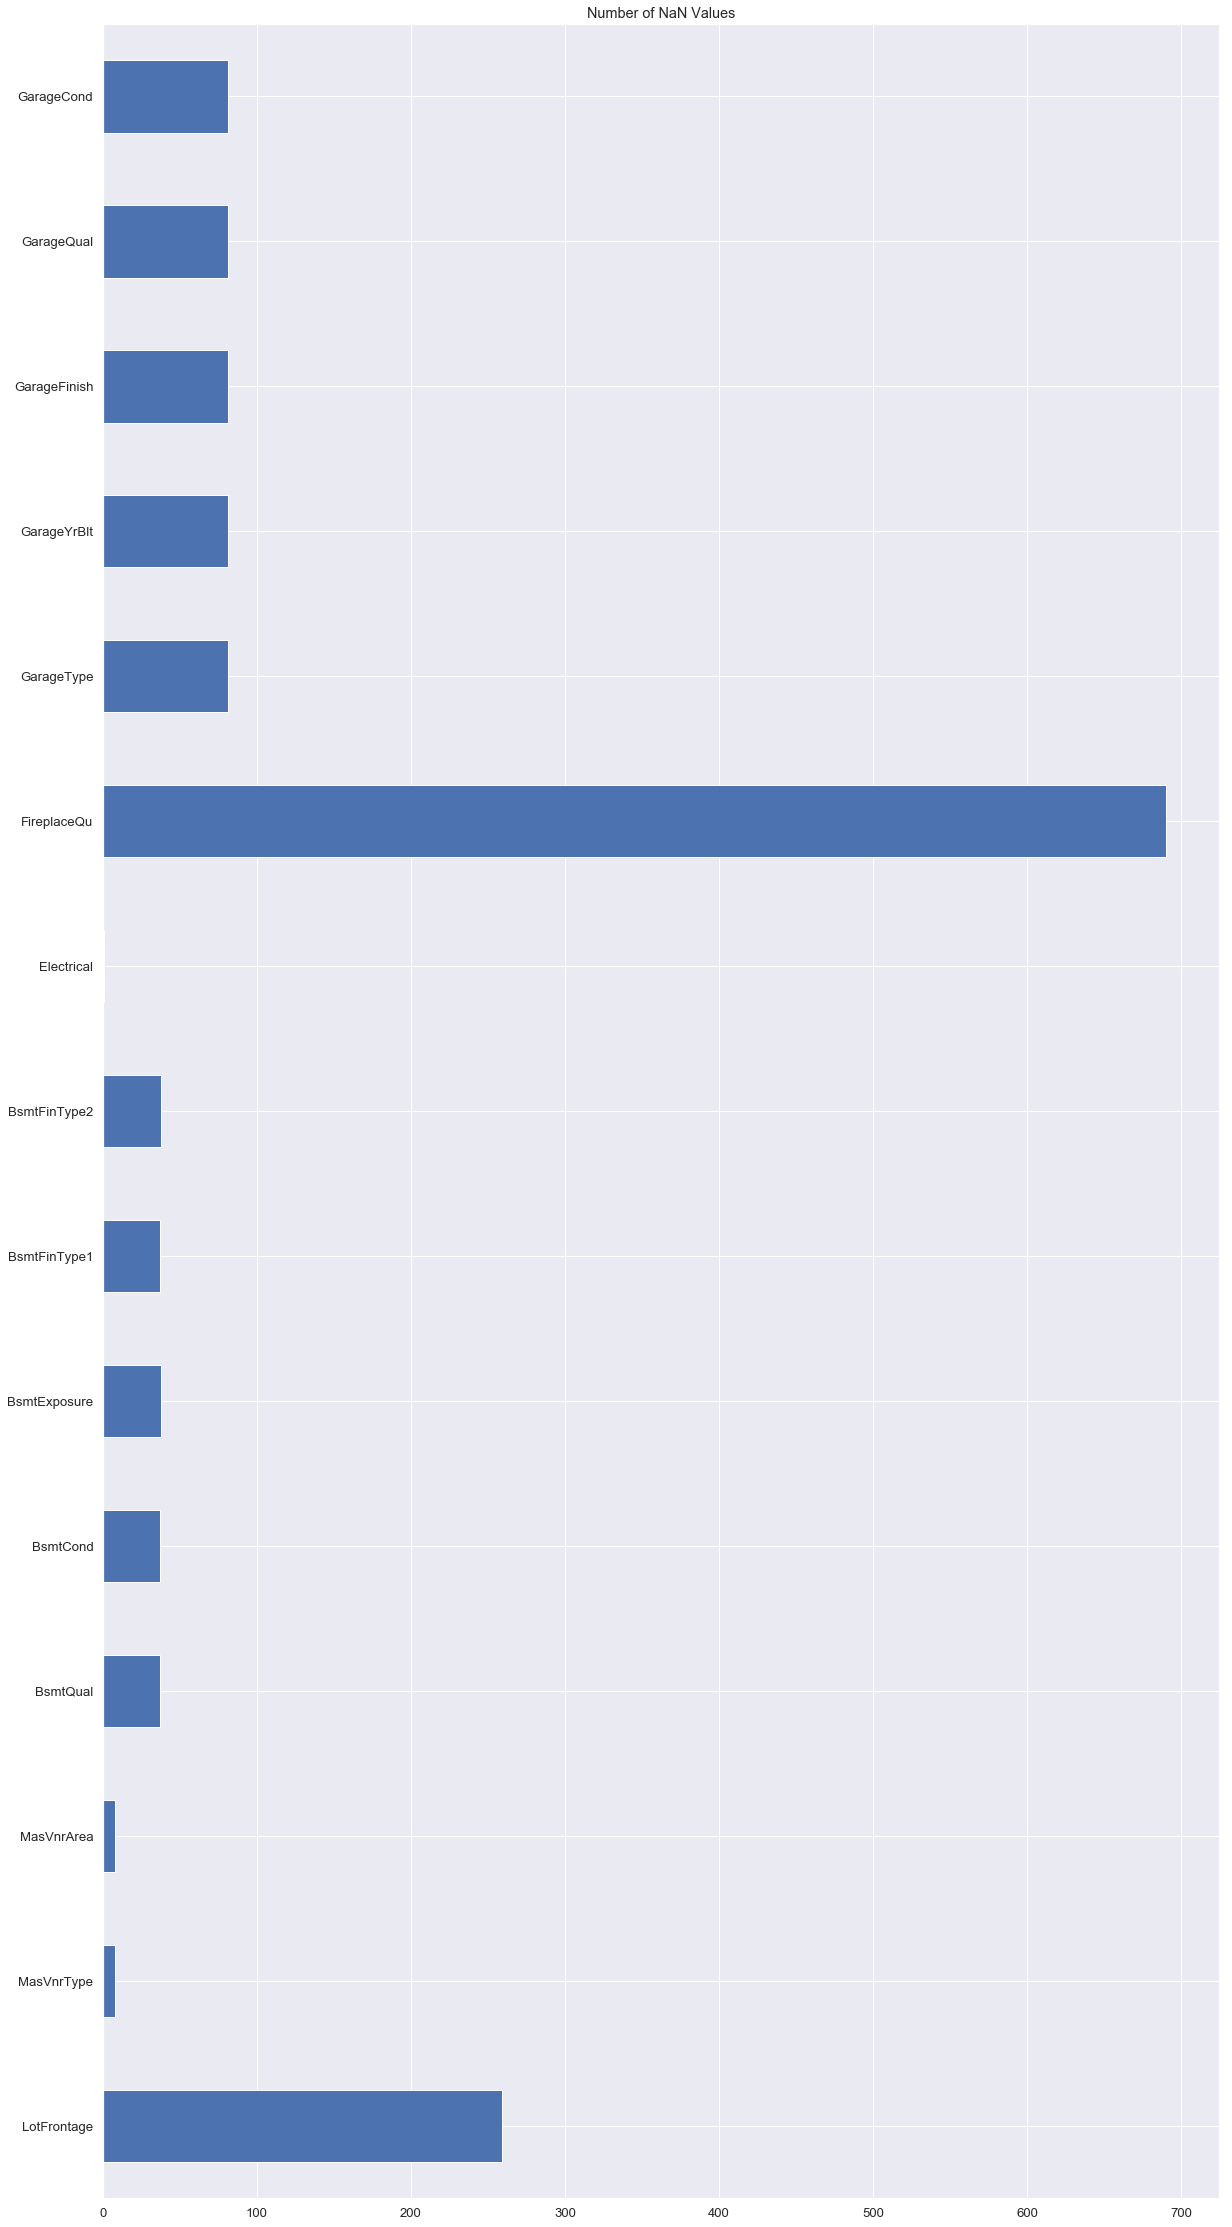

In [17]:
nanval = traindf.isna().sum()
plt.figure(figsize=(20, 40))
sns.set(font_scale=1.2)
nanval[nanval>0].plot(kind = "barh") #filterd more than zero
plt.title("Number of NaN Values")

Its good to remove the FireplaceQu feature as the number of null values are almost equal to 50% the 

In [18]:

traindf.isnull().sum()['FireplaceQu']

690

In [19]:
traindf.drop(['FireplaceQu'],axis=1,inplace=True)

In [20]:
#checking the maximum number of null values in our dataset
max(traindf.isnull().sum())

259

c:\users\mshk\appdata\local\programs\python\python35\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


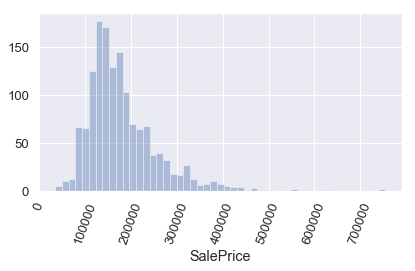

In [21]:
sns.distplot(traindf['SalePrice'], kde=False);
plt.xticks(rotation=70)
plt.tight_layout()


*The sale price distribution is right skewed*

**Data Processing**

In [22]:
#Filling missing values

In [23]:
nfeatures = traindf.select_dtypes(include=[np.number])
nfeatures.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
# Selecting category features
cfeats = traindf.select_dtypes(include=['object']).columns

In [25]:
cfeats

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [26]:
testdf.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [27]:
#Missing Values handling
#keep mean value in the missing value of the numerical category and mode in the categorical variable 
for i in nfeatures.columns:
    print(i)
    traindf[i]=traindf[i].fillna(traindf[i].mean())
    if i != 'SalePrice':
        testdf[i]=testdf[i].fillna(testdf[i].mean())
    
for i in cfeats:
    print(i)
    traindf[i]=traindf[i].fillna(traindf[i].mode()[0])
    testdf[i]=testdf[i].fillna(testdf[i].mode()[0])
    

MSSubClass
LotFrontage
LotArea
OverallQual
OverallCond
YearBuilt
YearRemodAdd
MasVnrArea
BsmtFinSF1
BsmtFinSF2
BsmtUnfSF
TotalBsmtSF
1stFlrSF
2ndFlrSF
LowQualFinSF
GrLivArea
BsmtFullBath
BsmtHalfBath
FullBath
HalfBath
BedroomAbvGr
KitchenAbvGr
TotRmsAbvGrd
Fireplaces
GarageYrBlt
GarageCars
GarageArea
WoodDeckSF
OpenPorchSF
EnclosedPorch
3SsnPorch
ScreenPorch
PoolArea
MiscVal
MoSold
YrSold
SalePrice
MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [28]:
testdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 75 columns):
MSSubClass       1459 non-null int64
MSZoning         1459 non-null object
LotFrontage      1459 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1459 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1459 non-null object
Exterior2nd      1459 non-null object
MasVnrType       1459 no

In [50]:
traindf.select_dtypes(include=[np.number]).columns.drop('SalePrice')

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [ ]:
['SalePrice'] 

In [34]:
#convert the categorical features into on hot encoding
onehotdf = pd.get_dummies(traindf.select_dtypes(include=['object']), dummy_na=True) 

In [38]:
#add categoricla and numerical columns
f_df_train = pd.concat([onehotdf, ],axis=1)

In [52]:
#test data set to on hot encoding 
onehotdftest = pd.get_dummies(testdf[traindf.select_dtypes(include=['object']).columns], dummy_na=True) 

In [57]:
#add two test dataframe
f_df_test = pd.concat([onehotdftest, testdf[traindf.select_dtypes(include=[np.number]).columns.drop('SalePrice')]],axis=1)

In [81]:
#get the difference between column names of both

extracol = list(set(f_df_train.columns) - set(f_df_test.columns))

In [82]:
# add zeros to these coloumns and attach with test dataframe
for i in extracol:
    f_df_test[i] = 0

In [87]:
f_df_test.drop(['SalePrice'],axis=1,inplace=True)

**Model Development**

As we have converted all the features to numeric we can develop a sale value prediction model

In [61]:
#data splitting
X_train=f_df_train.drop(['SalePrice'],axis=1)
y_train=f_df_train['SalePrice']

In [67]:
X_train

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_nan,Street_Grvl,Street_Pave,Street_nan,LotShape_IR1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0,0,0,1,0,0,0,1,0,0,...,548,0,61,0,0,0,0,0,2,2008
1,0,0,0,1,0,0,0,1,0,0,...,460,298,0,0,0,0,0,0,5,2007
2,0,0,0,1,0,0,0,1,0,1,...,608,0,42,0,0,0,0,0,9,2008
3,0,0,0,1,0,0,0,1,0,1,...,642,0,35,272,0,0,0,0,2,2006
4,0,0,0,1,0,0,0,1,0,1,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0,0,0,1,0,0,0,1,0,0,...,460,0,40,0,0,0,0,0,8,2007
1456,0,0,0,1,0,0,0,1,0,0,...,500,349,0,0,0,0,0,0,2,2010
1457,0,0,0,1,0,0,0,1,0,0,...,252,0,60,0,0,0,0,2500,5,2010
1458,0,0,0,1,0,0,0,1,0,0,...,240,366,0,112,0,0,0,0,4,2010


**ANN Training**

In [64]:
def rmse(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [68]:
# Initialising
classifier = Sequential()
# input layer and 1 st hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu',input_dim = 308))
# 2nd hidden layer
classifier.add(Dense(output_dim = 25, init = 'he_uniform',activation='relu'))
# 3rd hidden layer
classifier.add(Dense(output_dim = 50, init = 'he_uniform',activation='relu'))
# output layer
classifier.add(Dense(output_dim = 1, init = 'he_uniform'))
# compiling
classifier.compile(loss=rmse, optimizer='Adamax')
# training
model_history=classifier.fit(X_train.values, y_train.values,validation_split=0.20, batch_size = 10, nb_epoch = 1000)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1168 samples, validate on 292 samples
Epoch 1/1000
1168/1168 [==============================] - 2s - loss: 151749.2809 - val_loss: 70194.1906
Epoch 2/1000
1168/1168 [==============================] - 1s - loss: 67924.3975 - val_loss: 64448.0153
Epoch 3/1000
1168/1168 [==============================] - 1s - loss: 63092.5349 - val_loss: 61834.7214 - loss: 60265. - ETA: 0s - loss: 5984 - ETA: 0s - l - ETA: 0s - loss: 63485
Epoch 4/1000
1168/1168 [==============================] - 1s - loss: 60273.5638 - val_loss: 59710.8077
Epoch 5/1000
1168/1168 [==============================] - 1s - loss: 57694.0303 - val_loss: 57027.8360
Epoch 6/1000
1168/1168 [==============================] - 1s - loss: 53211.2216 - val_loss: 54529.2222
Epoch 7/1000
1168/1168 [==============================] - 1s - loss: 49592.3098 - val_loss: 52730.5243
Epoch 8/1000
1168/1168 [==============================] - 1s 

1168/1168 [==============================] - 0s - loss: 31787.5634 - val_loss: 44018.8013
Epoch 73/1000
1168/1168 [==============================] - 0s - loss: 32077.0025 - val_loss: 43894.4115
Epoch 74/1000
1168/1168 [==============================] - 0s - loss: 31881.6442 - val_loss: 43849.5132
Epoch 75/1000
1168/1168 [==============================] - 0s - loss: 31591.2922 - val_loss: 43747.2462
Epoch 76/1000
1168/1168 [==============================] - 0s - loss: 31390.6195 - val_loss: 43743.6129
Epoch 77/1000
1168/1168 [==============================] - 0s - loss: 31387.1213 - val_loss: 45359.9296
Epoch 78/1000
1168/1168 [==============================] - 0s - loss: 31709.0855 - val_loss: 43756.7343
Epoch 79/1000
1168/1168 [==============================] - 0s - loss: 31827.6004 - val_loss: 43846.9586
Epoch 80/1000
1168/1168 [==============================] - 0s - loss: 31441.0994 - val_loss: 43689.1382 ETA: 0s - 
Epoch 81/1000
1168/1168 [==============================] - 0s - los

1168/1168 [==============================] - 0s - loss: 27734.3999 - val_loss: 44108.3133
Epoch 149/1000
1168/1168 [==============================] - 0s - loss: 27739.6171 - val_loss: 41952.8503oss: 28910.327 - ET - ETA: 0s - loss: 2 - ETA: 0s - loss: 2
Epoch 150/1000
1168/1168 [==============================] - 1s - loss: 27678.0654 - val_loss: 42575.5857
Epoch 151/1000
1168/1168 [==============================] - 0s - loss: 28045.0767 - val_loss: 43588.8413TA: 0s
Epoch 152/1000
1168/1168 [==============================] - 0s - loss: 26935.9797 - val_loss: 41617.8215
Epoch 153/1000
1168/1168 [==============================] - 0s - loss: 27835.5323 - val_loss: 41595.5524
Epoch 154/1000
1168/1168 [==============================] - 0s - loss: 28207.8123 - val_loss: 44005.5292
Epoch 155/1000
1168/1168 [==============================] - 1s - loss: 27803.2188 - val_loss: 41615.8245
Epoch 156/1000
1168/1168 [==============================] - 1s - loss: 27307.3088 - val_loss: 41649.7261
Epoch

1168/1168 [==============================] - 0s - loss: 24962.4742 - val_loss: 39213.1065
Epoch 223/1000
1168/1168 [==============================] - 0s - loss: 25062.3981 - val_loss: 37813.6586
Epoch 224/1000
1168/1168 [==============================] - 0s - loss: 24468.5110 - val_loss: 37659.74322
Epoch 225/1000
1168/1168 [==============================] - 0s - loss: 24332.7268 - val_loss: 38031.4197
Epoch 226/1000
1168/1168 [==============================] - 0s - loss: 24693.8317 - val_loss: 37677.9577
Epoch 227/1000
1168/1168 [==============================] - 0s - loss: 24275.4425 - val_loss: 37834.5663
Epoch 228/1000
1168/1168 [==============================] - 0s - loss: 24559.0739 - val_loss: 38050.7170
Epoch 229/1000
1168/1168 [==============================] - 0s - loss: 24068.8807 - val_loss: 37528.6304
Epoch 230/1000
1168/1168 [==============================] - 0s - loss: 24249.7618 - val_loss: 38453.3680
Epoch 231/1000
1168/1168 [==============================] - 0s - loss

1168/1168 [==============================] - 0s - loss: 22671.6750 - val_loss: 35550.9811
Epoch 299/1000
1168/1168 [==============================] - 0s - loss: 23006.1437 - val_loss: 35482.99802
Epoch 300/1000
1168/1168 [==============================] - 0s - loss: 22665.4192 - val_loss: 35429.9712
Epoch 301/1000
1168/1168 [==============================] - 0s - loss: 22796.0796 - val_loss: 36431.1840
Epoch 302/1000
1168/1168 [==============================] - 0s - loss: 22785.5816 - val_loss: 35613.2960
Epoch 303/1000
1168/1168 [==============================] - 0s - loss: 22621.0420 - val_loss: 38179.7630
Epoch 304/1000
1168/1168 [==============================] - 0s - loss: 23272.6072 - val_loss: 36309.2310
Epoch 305/1000
1168/1168 [==============================] - 0s - loss: 22602.1114 - val_loss: 36349.9367
Epoch 306/1000
1168/1168 [==============================] - 0s - loss: 23383.4016 - val_loss: 38359.9629
Epoch 307/1000
1168/1168 [==============================] - 0s - loss

1168/1168 [==============================] - 0s - loss: 22027.7597 - val_loss: 40400.346221808.641 - ETA: 0s - loss: 21797.8
Epoch 376/1000
1168/1168 [==============================] - 0s - loss: 22220.8088 - val_loss: 33840.2628
Epoch 377/1000
1168/1168 [==============================] - 0s - loss: 21461.3309 - val_loss: 34293.392821859.0
Epoch 378/1000
1168/1168 [==============================] - 0s - loss: 21565.8009 - val_loss: 35026.8719
Epoch 379/1000
1168/1168 [==============================] - 0s - loss: 21343.8778 - val_loss: 34257.7208
Epoch 380/1000
1168/1168 [==============================] - 0s - loss: 21623.5804 - val_loss: 33955.9696
Epoch 381/1000
1168/1168 [==============================] - 0s - loss: 21692.1815 - val_loss: 34573.3681
Epoch 382/1000
1168/1168 [==============================] - 0s - loss: 21423.3685 - val_loss: 35375.6498
Epoch 383/1000
1168/1168 [==============================] - 0s - loss: 21625.3004 - val_loss: 33936.3695
Epoch 384/1000
1168/1168 [==

1168/1168 [==============================] - 0s - loss: 20123.7626 - val_loss: 32458.8852
Epoch 453/1000
1168/1168 [==============================] - 0s - loss: 20493.6026 - val_loss: 32462.3809
Epoch 454/1000
1168/1168 [==============================] - 0s - loss: 20438.6440 - val_loss: 32516.2532
Epoch 455/1000
1168/1168 [==============================] - 0s - loss: 20330.7581 - val_loss: 32753.5961
Epoch 456/1000
1168/1168 [==============================] - 0s - loss: 20278.3517 - val_loss: 32404.6573
Epoch 457/1000
1168/1168 [==============================] - 0s - loss: 20424.0128 - val_loss: 33479.6258
Epoch 458/1000
1168/1168 [==============================] - 0s - loss: 19955.0453 - val_loss: 33617.7522
Epoch 459/1000
1168/1168 [==============================] - 0s - loss: 20605.0920 - val_loss: 34082.4485
Epoch 460/1000
1168/1168 [==============================] - 0s - loss: 20361.4161 - val_loss: 32918.8628
Epoch 461/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 19228.8757 - val_loss: 33310.5607
Epoch 530/1000
1168/1168 [==============================] - 0s - loss: 19113.0348 - val_loss: 33125.8659
Epoch 531/1000
1168/1168 [==============================] - 0s - loss: 19736.4995 - val_loss: 33019.6032
Epoch 532/1000
1168/1168 [==============================] - 0s - loss: 19990.6630 - val_loss: 32559.8451
Epoch 533/1000
1168/1168 [==============================] - 0s - loss: 19869.4549 - val_loss: 30857.3590
Epoch 534/1000
1168/1168 [==============================] - 0s - loss: 19776.3156 - val_loss: 30951.6370
Epoch 535/1000
1168/1168 [==============================] - 0s - loss: 19962.7926 - val_loss: 31131.2039
Epoch 536/1000
1168/1168 [==============================] - 0s - loss: 20521.0133 - val_loss: 31035.3683
Epoch 537/1000
1168/1168 [==============================] - 0s - loss: 19371.6605 - val_loss: 31531.1414
Epoch 538/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 18210.8040 - val_loss: 30555.4595
Epoch 608/1000
1168/1168 [==============================] - 0s - loss: 19008.5561 - val_loss: 35269.8207
Epoch 609/1000
1168/1168 [==============================] - 0s - loss: 18789.6296 - val_loss: 31070.4373
Epoch 610/1000
1168/1168 [==============================] - 0s - loss: 18476.6197 - val_loss: 30778.5506
Epoch 611/1000
1168/1168 [==============================] - 0s - loss: 19014.7373 - val_loss: 29963.8441
Epoch 612/1000
1168/1168 [==============================] - 0s - loss: 18538.8257 - val_loss: 30403.2515
Epoch 613/1000
1168/1168 [==============================] - 0s - loss: 19092.4750 - val_loss: 30498.4657
Epoch 614/1000
1168/1168 [==============================] - 0s - loss: 19094.6576 - val_loss: 30492.1339
Epoch 615/1000
1168/1168 [==============================] - 0s - loss: 18853.3148 - val_loss: 30825.0062
Epoch 616/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 17969.1198 - val_loss: 29856.8203
Epoch 686/1000
1168/1168 [==============================] - 0s - loss: 18667.9518 - val_loss: 30541.8599
Epoch 687/1000
1168/1168 [==============================] - 0s - loss: 17795.2425 - val_loss: 30391.3349
Epoch 688/1000
1168/1168 [==============================] - 0s - loss: 17706.8143 - val_loss: 30048.3029
Epoch 689/1000
1168/1168 [==============================] - 0s - loss: 17780.9542 - val_loss: 31811.8122
Epoch 690/1000
1168/1168 [==============================] - 0s - loss: 18026.8275 - val_loss: 29856.9296
Epoch 691/1000
1168/1168 [==============================] - 0s - loss: 18191.2561 - val_loss: 33067.4150
Epoch 692/1000
1168/1168 [==============================] - 0s - loss: 17979.9332 - val_loss: 30109.9730
Epoch 693/1000
1168/1168 [==============================] - 0s - loss: 18618.4456 - val_loss: 32021.5254
Epoch 694/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 17835.4291 - val_loss: 30067.6542
Epoch 764/1000
1168/1168 [==============================] - 0s - loss: 18567.6975 - val_loss: 30032.9460
Epoch 765/1000
1168/1168 [==============================] - 0s - loss: 17298.8133 - val_loss: 29992.9209
Epoch 766/1000
1168/1168 [==============================] - 0s - loss: 17517.6954 - val_loss: 31651.6576
Epoch 767/1000
1168/1168 [==============================] - 0s - loss: 17045.2132 - val_loss: 32528.5847
Epoch 768/1000
1168/1168 [==============================] - 0s - loss: 17920.9327 - val_loss: 29153.8911
Epoch 769/1000
1168/1168 [==============================] - 0s - loss: 18494.8278 - val_loss: 29787.3842
Epoch 770/1000
1168/1168 [==============================] - 0s - loss: 17106.0127 - val_loss: 29919.3635
Epoch 771/1000
1168/1168 [==============================] - 0s - loss: 17485.6370 - val_loss: 29540.6257
Epoch 772/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 17433.9154 - val_loss: 30195.7279
Epoch 841/1000
1168/1168 [==============================] - 0s - loss: 16505.7130 - val_loss: 31866.2229
Epoch 842/1000
1168/1168 [==============================] - 0s - loss: 17328.1198 - val_loss: 30033.4490
Epoch 843/1000
1168/1168 [==============================] - 0s - loss: 17015.4618 - val_loss: 30329.3834
Epoch 844/1000
1168/1168 [==============================] - 0s - loss: 17570.6604 - val_loss: 29701.7688
Epoch 845/1000
1168/1168 [==============================] - 0s - loss: 18196.8473 - val_loss: 32055.1935
Epoch 846/1000
1168/1168 [==============================] - 0s - loss: 17056.7555 - val_loss: 30188.7261
Epoch 847/1000
1168/1168 [==============================] - 0s - loss: 16919.3610 - val_loss: 29303.3247
Epoch 848/1000
1168/1168 [==============================] - 0s - loss: 16945.5925 - val_loss: 30420.5459
Epoch 849/1000
1168/1168 [==============================] - 0s - loss:

1168/1168 [==============================] - 0s - loss: 16993.7537 - val_loss: 29799.568214633.712
Epoch 919/1000
1168/1168 [==============================] - 0s - loss: 16908.7548 - val_loss: 30333.6100
Epoch 920/1000
1168/1168 [==============================] - 0s - loss: 18024.4386 - val_loss: 30356.1880
Epoch 921/1000
1168/1168 [==============================] - 0s - loss: 16660.4284 - val_loss: 30149.0696
Epoch 922/1000
1168/1168 [==============================] - 0s - loss: 16932.1135 - val_loss: 29540.8915
Epoch 923/1000
1168/1168 [==============================] - 0s - loss: 16530.6844 - val_loss: 31326.7151
Epoch 924/1000
1168/1168 [==============================] - 0s - loss: 16701.0742 - val_loss: 29667.3648
Epoch 925/1000
1168/1168 [==============================] - 1s - loss: 16587.4995 - val_loss: 30747.1398
Epoch 926/1000
1168/1168 [==============================] - 1s - loss: 16729.9477 - val_loss: 30445.1993
Epoch 927/1000
1168/1168 [==============================] - 1

1168/1168 [==============================] - 0s - loss: 16684.6355 - val_loss: 28407.9008
Epoch 995/1000
1168/1168 [==============================] - 0s - loss: 16252.0046 - val_loss: 29307.1726
Epoch 996/1000
1168/1168 [==============================] - 0s - loss: 16644.5367 - val_loss: 28244.4617
Epoch 997/1000
1168/1168 [==============================] - 1s - loss: 16699.4701 - val_loss: 30909.7860
Epoch 998/1000
1168/1168 [==============================] - 0s - loss: 16021.0075 - val_loss: 29018.1186
Epoch 999/1000
1168/1168 [==============================] - 1s - loss: 15915.3192 - val_loss: 29775.4873
Epoch 1000/1000
1168/1168 [==============================] - 1s - loss: 16077.8767 - val_loss: 28685.1764


In [88]:
ann_pred=classifier.predict(f_df_test.values)

In [97]:
finpred = []
for i in ann_pred:
    finpred.append(i[0])
    

**Result Covert to csv**

In [90]:
testdf = pd.read_csv('test.csv')

In [93]:
#get the ID
newdf = testdf[['Id']]

In [99]:
newdf['SalePrice'] = finpred

c:\users\mshk\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
newdf

,Id,SalePrice
0,1461,1.176530e+07
1,1462,8.141816e+05
2,1463,1.315460e+07
3,1464,1.275266e+07
4,1465,1.150053e+07
...,...,...
1454,2915,1.251770e+07
1455,2916,1.242038e+07
1456,2917,1.283742e+07
1457,2918,1.183472e+07


In [101]:
#convert into csv
newdf.to_csv('kpmgcase2.csv')